In [ ]:
!git clone https://github.com/huggingface/diffusers.git

fatal: destination path 'diffusers' already exists and is not an empty directory.


In [ ]:
!git clone https://github.com/google/dreambooth.git

fatal: destination path 'dreambooth' already exists and is not an empty directory.


In [ ]:
%cd diffusers

/content/diffusers


In [ ]:
!pip install -e .


Obtaining file:///content/diffusers
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for diffusers (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.32.0.dev0-0.editable-py3-none-any.whl size=11132 sha256=3585c164b1923ef328be56aabb6367c1235ee8fdfccb992e558166aa4e6f7ea2
  Stored in directory: /tmp/pip-ephem-wheel-cache-_nm19k85/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.32.0.dev0
    Uninstalling diffusers-0.32.0.dev0:
      Successfully uninstalled diffusers-0.32.0.dev0


In [ ]:
%cd examples/dreambooth

/content/diffusers/examples/dreambooth


In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip install diffusers transformers

In [ ]:
!pip install xformers

In [ ]:
!pip install bitsandbytes

In [ ]:
!pip install --upgrade diffusers huggingface_hub
from huggingface_hub.constants import HF_HOME

In [ ]:
!pip install --upgrade huggingface_hub

In [ ]:
!accelerate config default

Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


In [ ]:
from huggingface_hub import snapshot_download

local_dir = "./dog"
snapshot_download(
    "diffusers/dog-example",
    local_dir=local_dir, repo_type="dataset",
    ignore_patterns=".gitattributes",
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

'/content/diffusers/examples/dreambooth/dog'

In [ ]:
!rm -rf /content/diffusers/examples/dreambooth/dog/.cache
!rm -rf /content/diffusers/examples/dreambooth/dog/.ipynb_checkpoints

In [ ]:
import torch

In [ ]:
torch.cuda.set_per_process_memory_fraction(0.5, 0)

In [ ]:
!PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True

In [ ]:
torch.cuda.empty_cache()

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) N
Token is valid (permission: fineGrained).
The token `DrmBOoth` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `DrmBOoth`

In [ ]:
!export PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:64

!export MODEL_NAME="CompVis/stable-diffusion-v1-4"
!export INSTANCE_DIR="dog"
!export CLASS_DIR="path-to-class-images"
!export OUTPUT_DIR="path-to-save-model"

!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path="CompVis/stable-diffusion-v1-4"  \
  --instance_data_dir="/content/diffusers/examples/dreambooth/dog" \
  --class_data_dir="/content/diffusers/examples/dreambooth/dog" \
  --output_dir="/content/models/dreambooth_output" \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --instance_prompt="my dog teddy" \
  --class_prompt="a photo of dog" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 --gradient_checkpointing \
  --use_8bit_adam \
  --enable_xformers_memory_efficient_attention \
  --set_grads_to_none \
  --learning_rate=2e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --num_class_images=5 \
  --max_train_steps=800 \
  --push_to_hub

2024-12-03 06:26:20.504498: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-03 06:26:20.523528: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-03 06:26:20.529664: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 06:26:20.543758: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-03 06:26:21.694729: W tensorflow/comp

In [ ]:
!pip install diffusers

In [ ]:
!pip install transformers

In [ ]:
!ls

dog		       requirements.txt		     train_dreambooth_flux.py
README_flux.md	       test_dreambooth_flux.py	     train_dreambooth_lora_flux.py
README.md	       test_dreambooth_lora_edm.py   train_dreambooth_lora.py
README_sd3.md	       test_dreambooth_lora_flux.py  train_dreambooth_lora_sd3.py
README_sdxl.md	       test_dreambooth_lora.py	     train_dreambooth_lora_sdxl.py
requirements_flax.txt  test_dreambooth_lora_sd3.py   train_dreambooth.py
requirements_flux.txt  test_dreambooth.py	     train_dreambooth_sd3.py
requirements_sd3.txt   test_dreambooth_sd3.py
requirements_sdxl.txt  train_dreambooth_flax.py


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

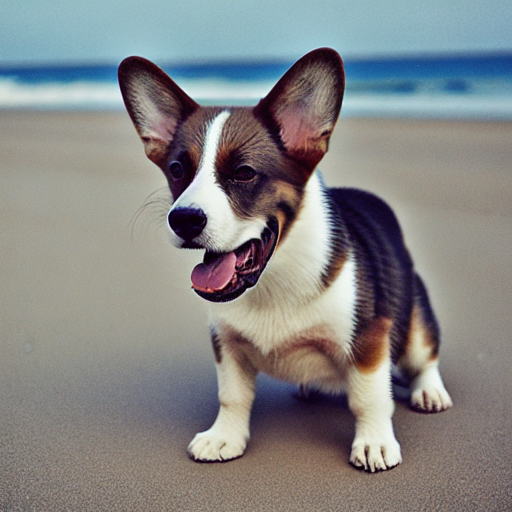

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from IPython.display import display

model_id = "/content/models/dreambooth_output"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

prompt = "dog in in beach"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]

image.save("/content/dogbeach.png")
display(image)

  0%|          | 0/50 [00:00<?, ?it/s]

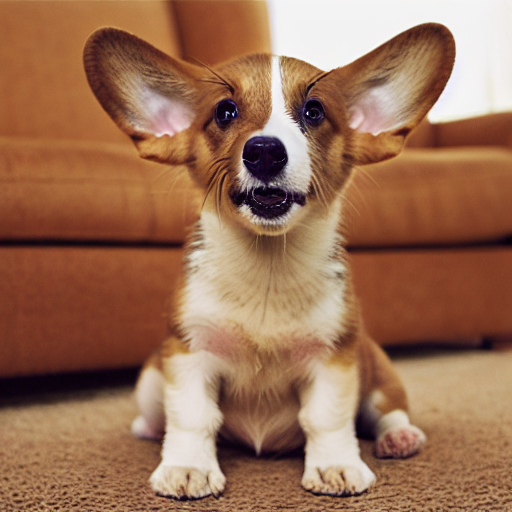

In [ ]:
prompt = "dog in in living room"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]

image.save("/content/dogROOM.png")
display(image)

  0%|          | 0/50 [00:00<?, ?it/s]

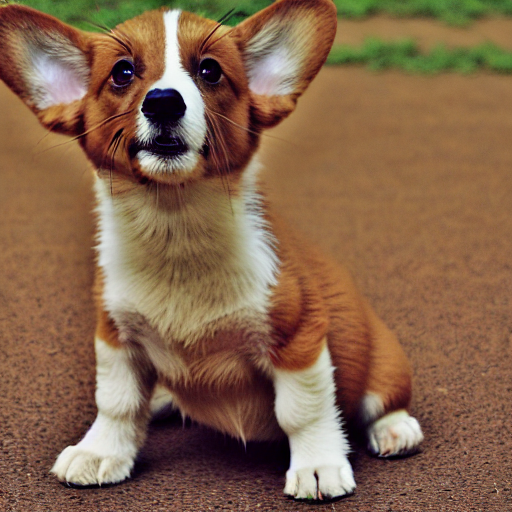

In [ ]:
prompt = "my dog teddy in park"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]

image.save("/content/dogbeach.png")
display(image)

  0%|          | 0/100 [00:00<?, ?it/s]

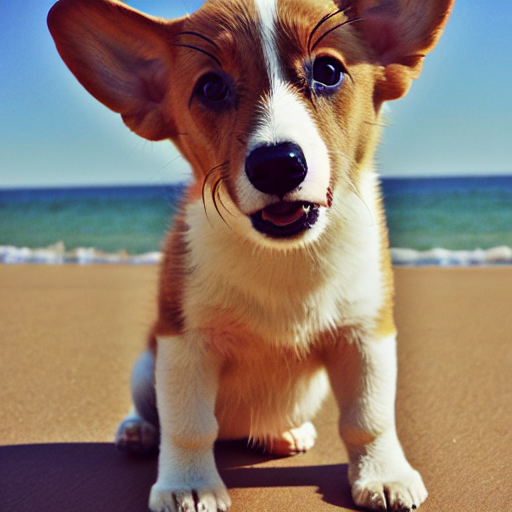

In [ ]:
prompt = "my dog teddy in beach"
image = pipe(prompt, num_inference_steps=100, guidance_scale=7.5).images[0]

image.save("/content/dogbeach.png")
display(image)

  0%|          | 0/50 [00:00<?, ?it/s]

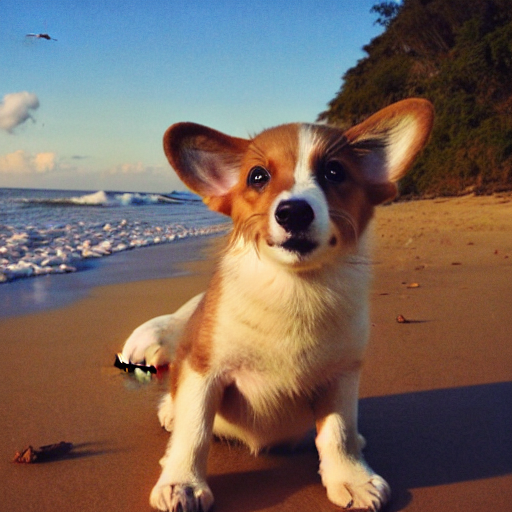

In [ ]:
prompt = "my dog teddy playing in beach"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]

image.save("/content/dogplaybeach.png")
display(image)

  0%|          | 0/50 [00:00<?, ?it/s]

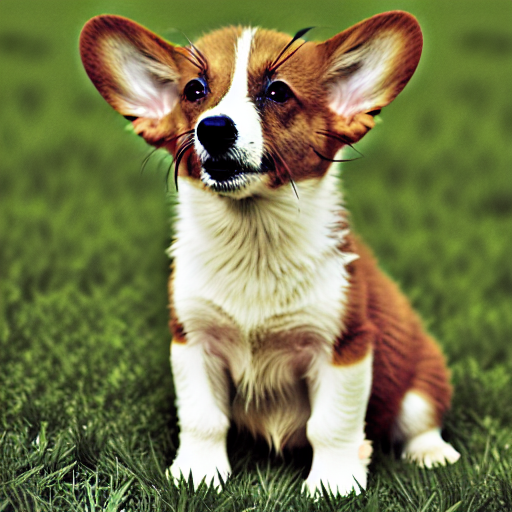

In [ ]:
prompt = "my dog teddy in lawn"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]

image.save("/content/doglawn.png")
display(image)

  0%|          | 0/100 [00:00<?, ?it/s]

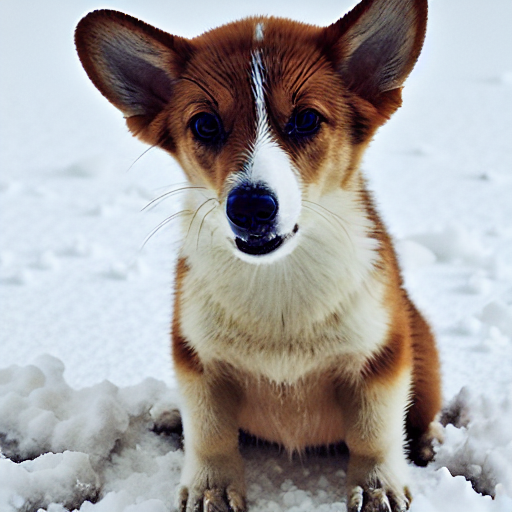

In [ ]:
prompt = "my dog teddy in snow"
image = pipe(prompt, num_inference_steps=100, guidance_scale=7.5).images[0]

image.save("/content/dogmount.png")
display(image)

  0%|          | 0/100 [00:00<?, ?it/s]

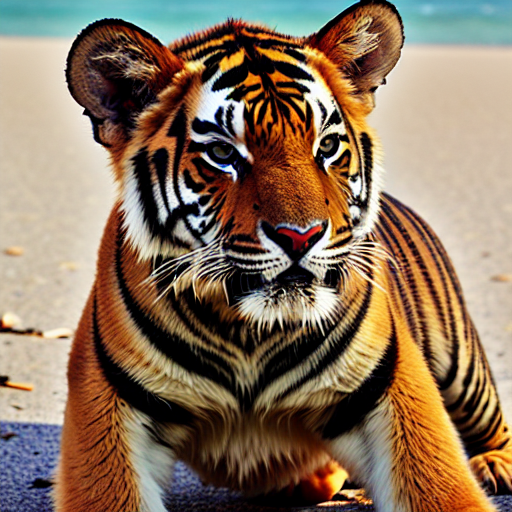

In [ ]:
prompt = "tiger in beach"
image = pipe(prompt, num_inference_steps=100, guidance_scale=7.5).images[0]

image.save("/content/tiger.png")
display(image)